In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [2]:
# define the data path and get all csv filenames using glob
data_path = "./archive/"
csv_files = glob.glob1(data_path, "*.csv")

In [3]:
# initial data csv files
csv_files

['audi.csv',
 'bmw.csv',
 'cclass.csv',
 'focus.csv',
 'ford.csv',
 'hyundi.csv',
 'merc.csv',
 'skoda.csv',
 'toyota.csv',
 'unclean cclass.csv',
 'unclean focus.csv',
 'vauxhall.csv',
 'vw.csv']

In [4]:
# these files are not relevant to our project
files_to_remove = ['cclass.csv',
                   'focus.csv',
                   'unclean cclass.csv',
                   'unclean focus.csv',]

In [5]:
# remove the files we don't want to consider
for filename in files_to_remove:
    csv_files.remove(filename)

In [6]:
csv_files

['audi.csv',
 'bmw.csv',
 'ford.csv',
 'hyundi.csv',
 'merc.csv',
 'skoda.csv',
 'toyota.csv',
 'vauxhall.csv',
 'vw.csv']

In [7]:
car_df = pd.read_csv(os.path.join(data_path, csv_files[0]))

In [8]:
car_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [9]:
# for csv in csv_files[1:]:
#     temp_df = pd.read_csv(os.path.join(data_path, csv))
#     if csv == 'hyundi.csv':
#         temp_df.columns = ['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']    
#     car_df = pd.concat([car_df, temp_df], axis=0)

In [10]:
# car_df

In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [12]:
car_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


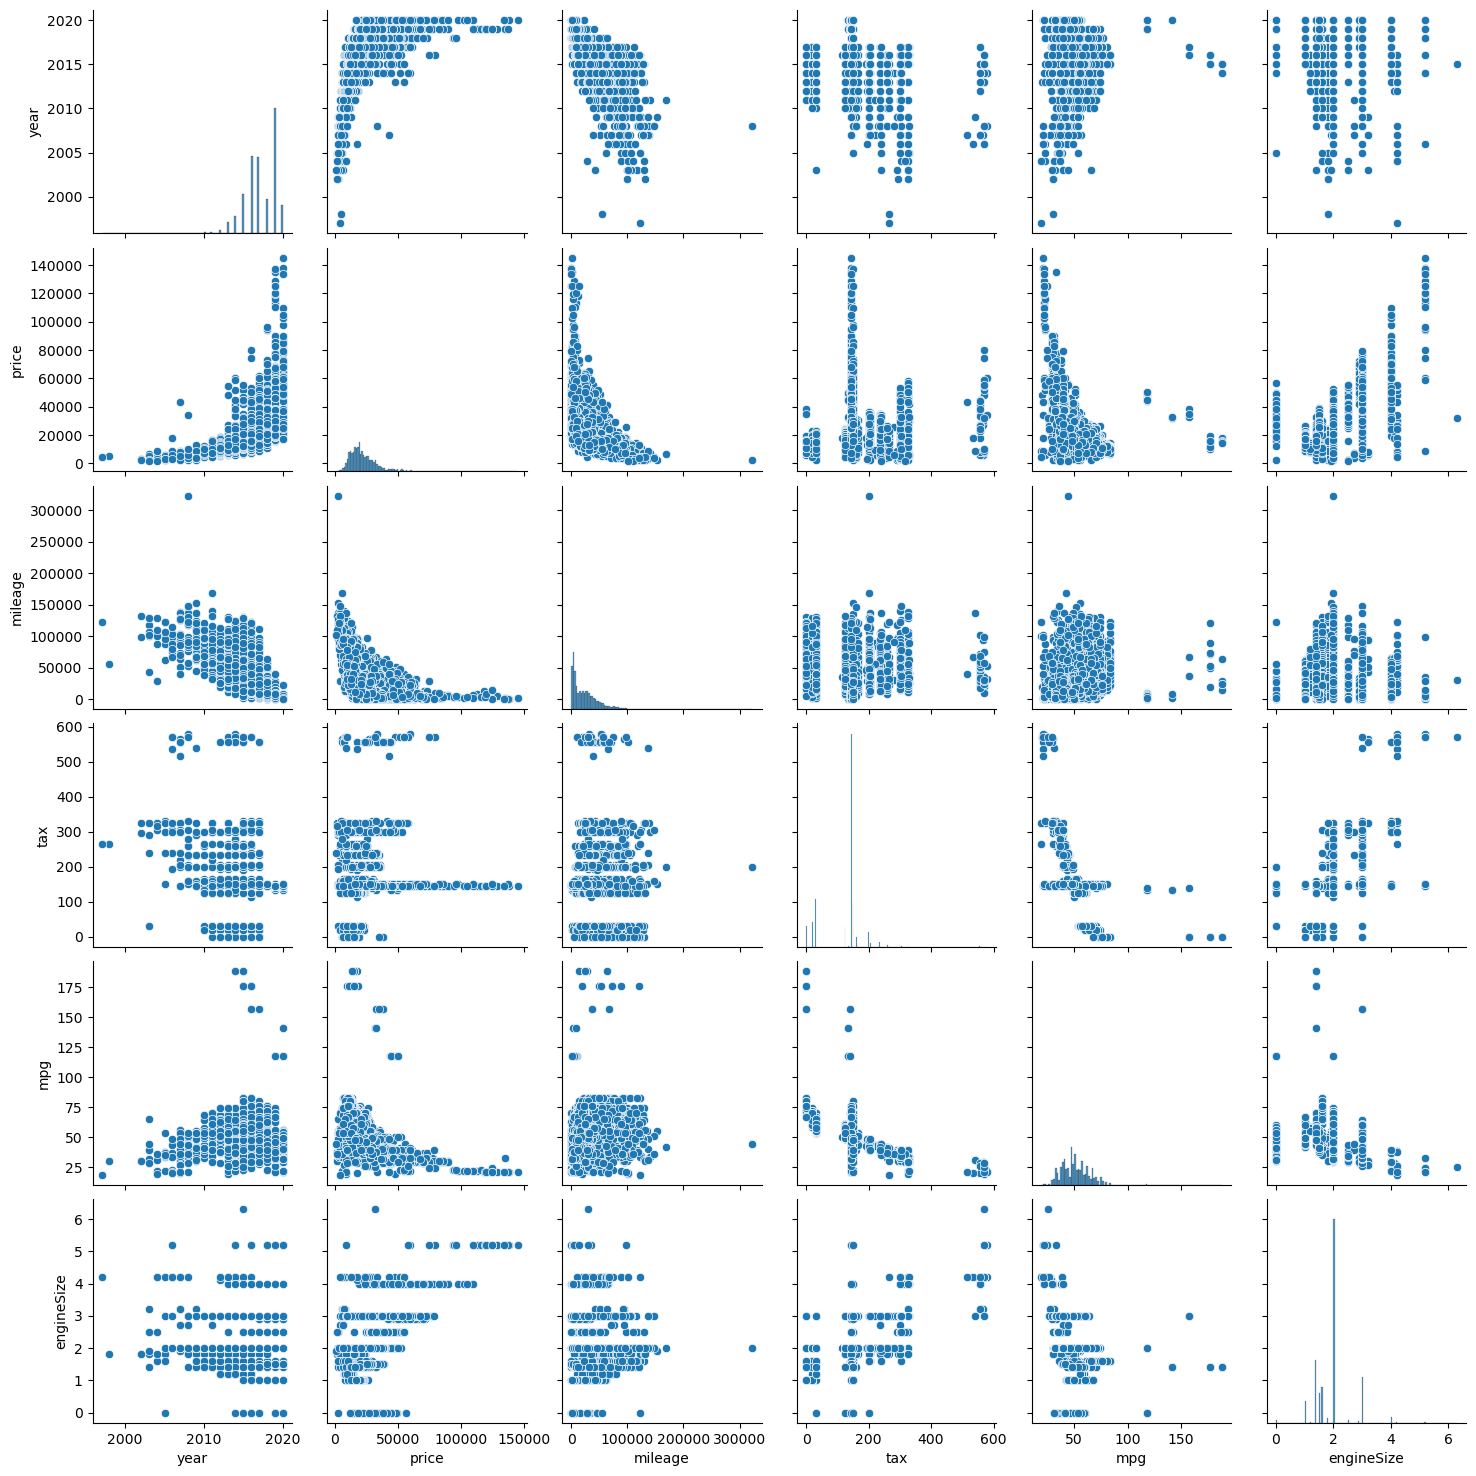

In [13]:
sns.pairplot(car_df)

C:\Users\Hassaan\AppData\Local\Temp\ipykernel_23608\977332779.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data=car_df.corr(), annot=True, linewidths=.5, cmap="Reds", annot_kws={"size": 10})


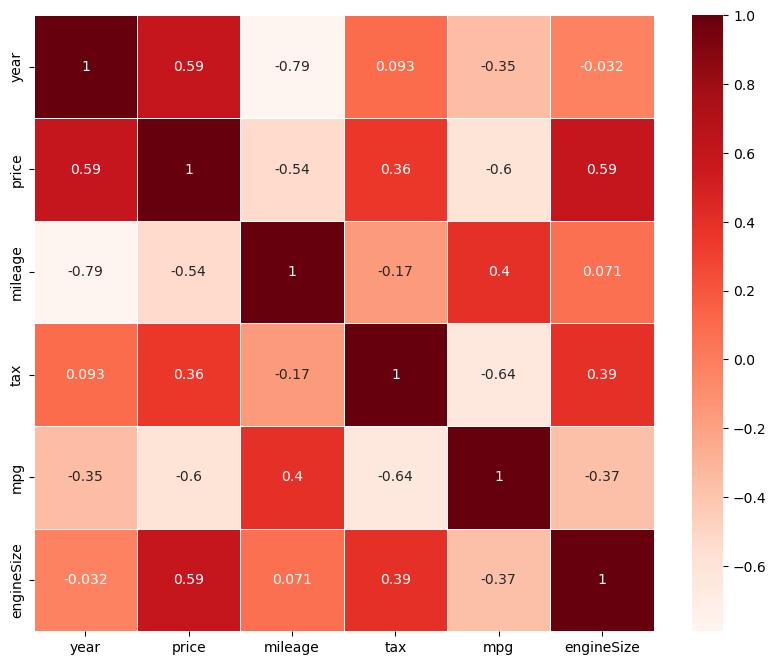

In [14]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data=car_df.corr(), annot=True, linewidths=.5, cmap="Reds", annot_kws={"size": 10})
plt.show()

year


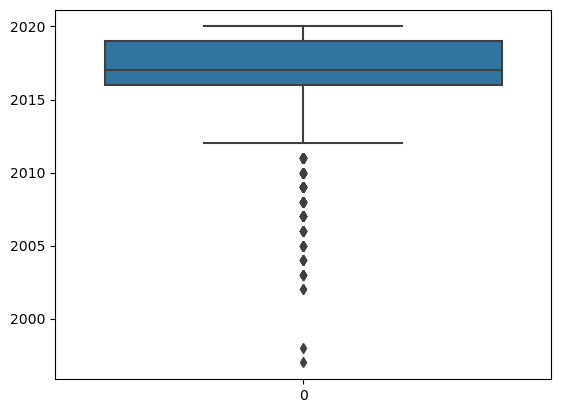

mileage


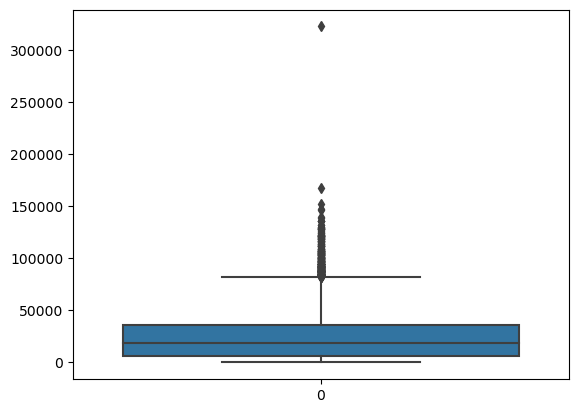

tax


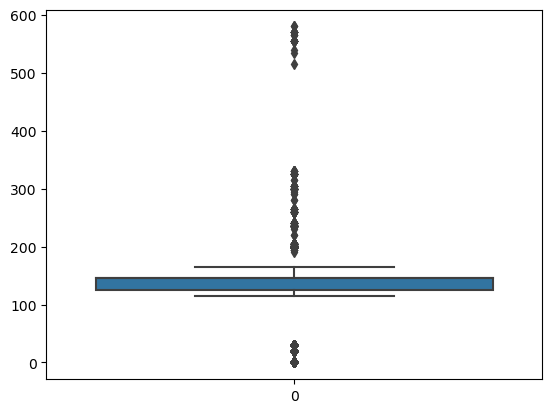

mpg


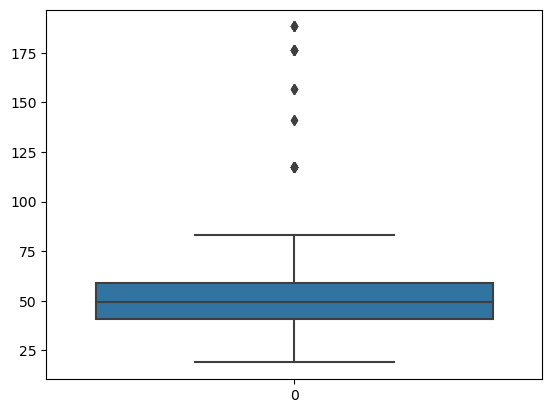

engineSize


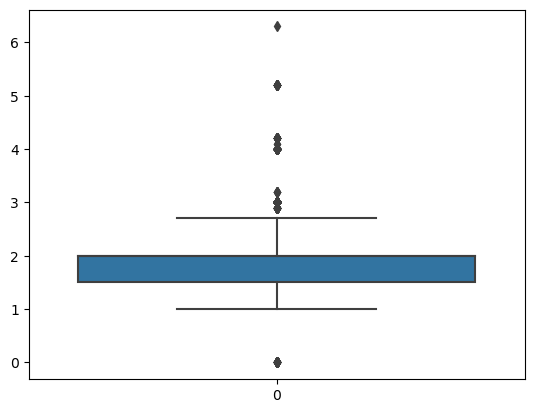

In [15]:
for column in car_df.columns:
    if column not in ['transmission', 'fuelType', 'price', 'model']:
        print(column)
        sns.boxplot(data=car_df[column])
        plt.show()

In [16]:
for column in car_df.columns:
    if column not in ['transmission', 'fuelType', 'price', 'model', 'mpg']:
        Q1 = car_df[column].quantile(0.25)
        Q3 = car_df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        print(column, Q1, Q3, IQR)
        car_df = car_df[~((car_df[column] < (Q1 - 1.5 * IQR)) | (car_df[column] > (Q3 + 1.5 * IQR)))]

year 2016.0 2019.0 3.0
mileage 5799.0 35424.5 29625.5
tax 125.0 145.0 20.0
engineSize 1.5 2.0 0.5


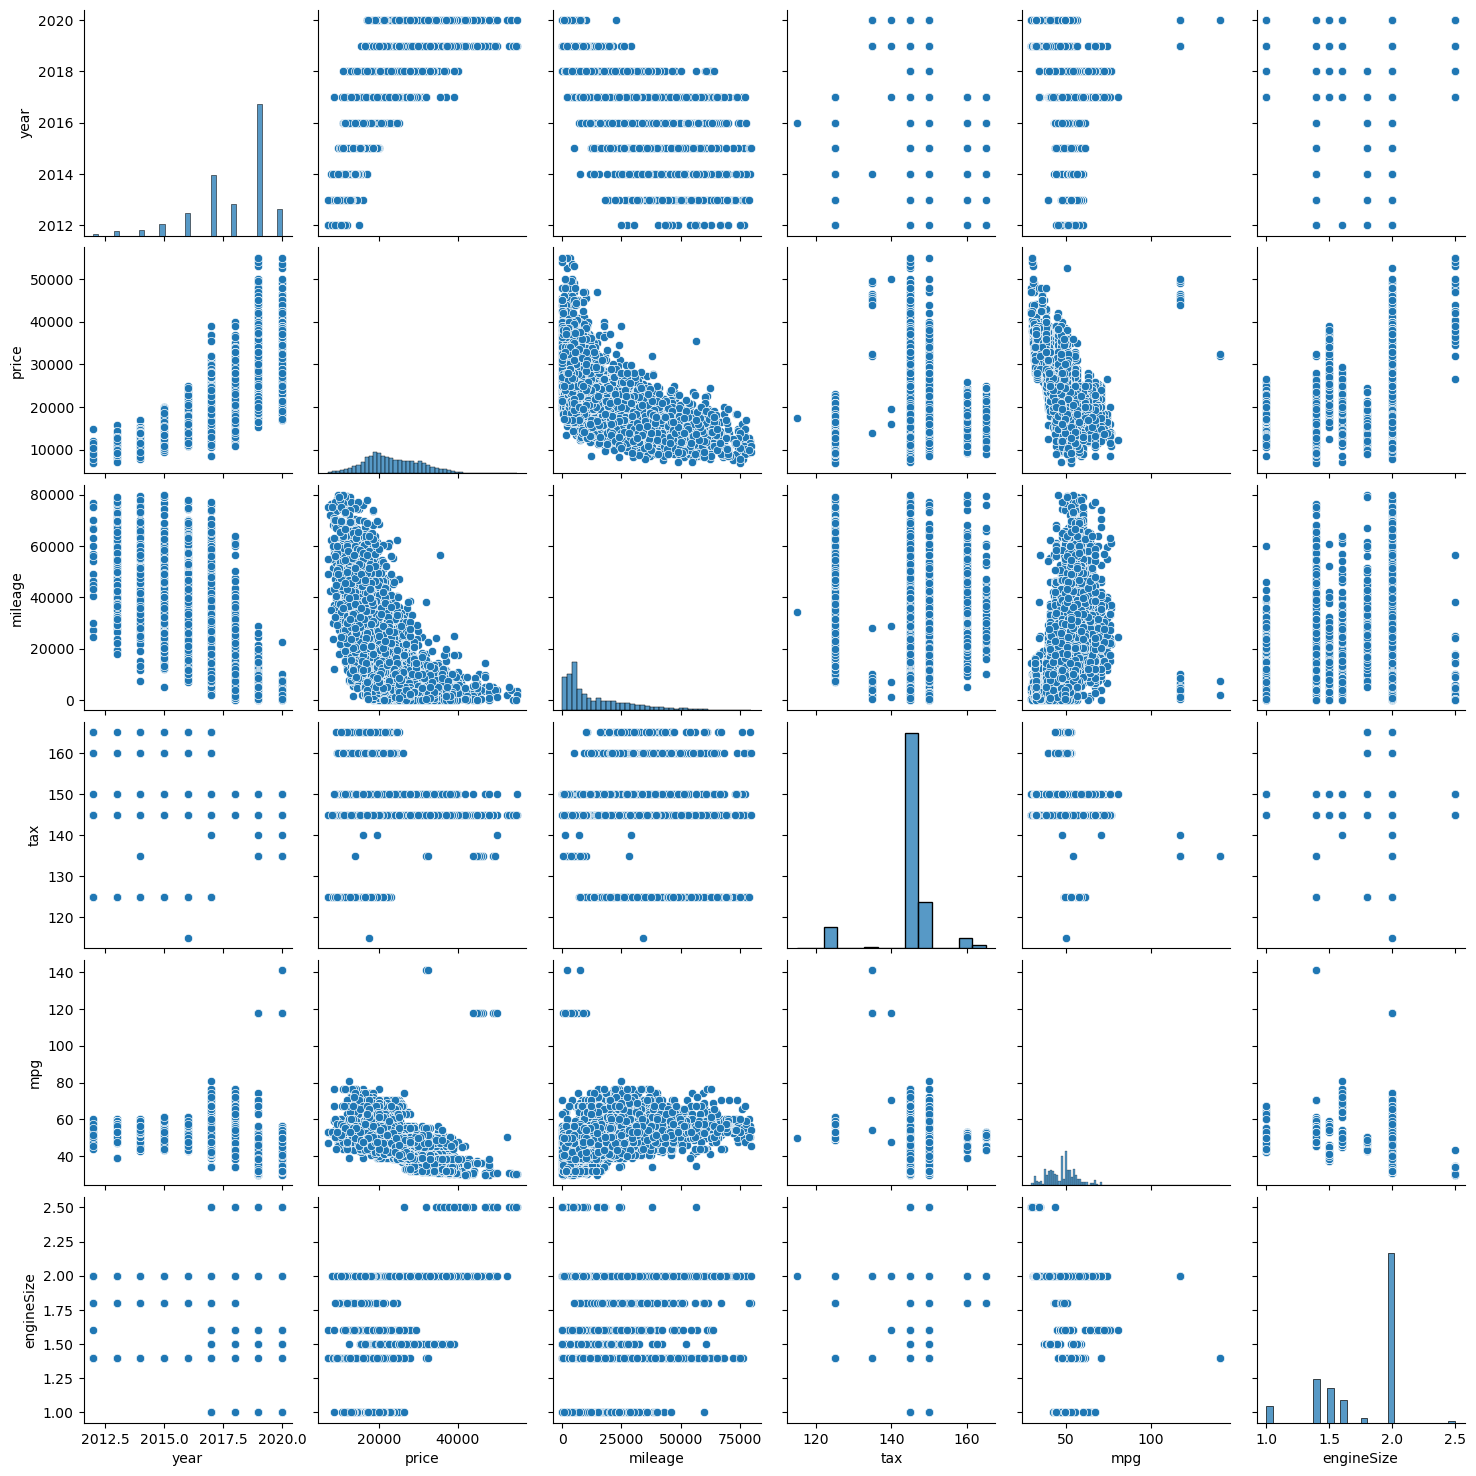

In [17]:
sns.pairplot(car_df)

C:\Users\Hassaan\AppData\Local\Temp\ipykernel_23608\977332779.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data=car_df.corr(), annot=True, linewidths=.5, cmap="Reds", annot_kws={"size": 10})


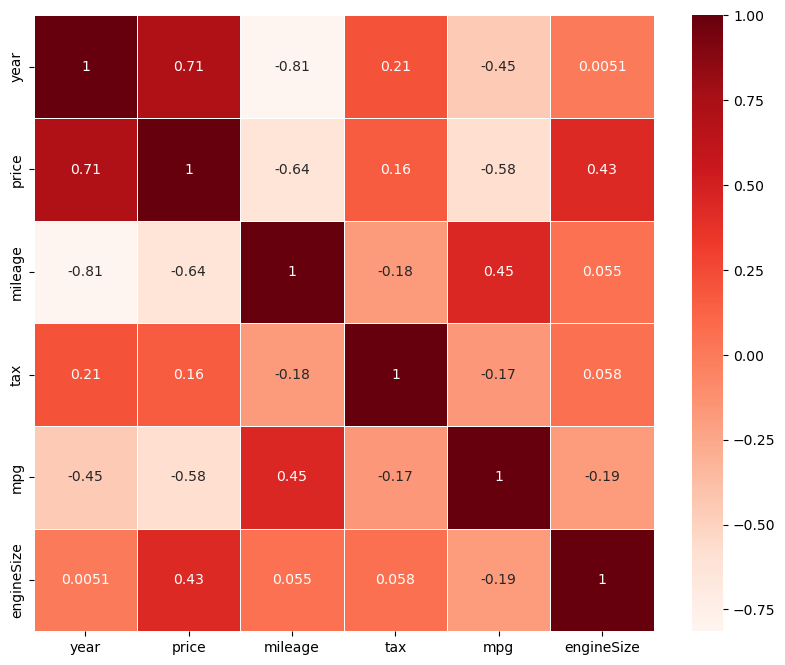

In [18]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data=car_df.corr(), annot=True, linewidths=.5, cmap="Reds", annot_kws={"size": 10})
plt.show()

In [19]:
for column in car_df.columns:
    print(f"Column: {column}\nValues: {car_df[column].unique()}\nCount:{car_df[column].nunique()}\n")

Column: model
Values: [' A1' ' A4' ' A3' ' A6' ' Q3' ' A5' ' Q2' ' Q5' ' TT' ' RS3' ' A7' ' S3']
Count:12

Column: year
Values: [2017 2019 2016 2014 2018 2013 2015 2020 2012]
Count:9

Column: price
Values: [12500 16800 17300 ...  9291 12695 17199]
Count:2016

Column: transmission
Values: ['Manual' 'Automatic' 'Semi-Auto']
Count:3

Column: mileage
Values: [15735 25952  1998 ...  4018  1978  8646]
Count:4427

Column: fuelType
Values: ['Petrol' 'Diesel' 'Hybrid']
Count:3

Column: tax
Values: [150 145 125 160 165 135 140 115]
Count:8

Column: mpg
Values: [ 55.4  67.3  49.6  58.9  57.6  52.3  53.3  47.9  62.8  61.4  56.5  70.6
  51.4  65.7  50.4  72.4  57.7  54.3  40.4  44.1  38.7  33.2  42.8  42.2
  68.9  44.8  47.1  48.7  40.9  60.1  39.8  39.2  41.5  38.2  32.1  30.7
  43.5  30.1  45.6  64.2  34.9  34.5  76.3  46.3  37.2  34.   31.7  32.5
  37.7  74.3  31.4 141.3  31.   36.2  36.7 117.7  35.3  76.4  35.8  29.7
  80.7  50. ]
Count:62

Column: engineSize
Values: [1.4 2.  1.  1.8 1.5 1.6 2.

In [20]:
# can't use model since too many unique values, other categorical columns can be one hot encoded
car_df_one_hot_encoded = pd.get_dummies(car_df, columns=['transmission', 'fuelType'])

In [21]:
car_df_one_hot_encoded

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,A1,2017,12500,15735,150,55.4,1.4,0,1,0,0,0,1
3,A4,2017,16800,25952,145,67.3,2.0,1,0,0,1,0,0
4,A3,2019,17300,1998,145,49.6,1.0,0,1,0,0,0,1
10,A3,2017,16100,28955,145,58.9,1.4,0,1,0,0,0,1
11,A6,2016,16500,52198,125,57.6,2.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,4018,145,49.6,1.0,0,1,0,0,0,1
10664,A3,2020,16999,1978,150,49.6,1.0,0,1,0,0,0,1
10665,A3,2020,17199,609,150,49.6,1.0,0,1,0,0,0,1
10666,Q3,2017,19499,8646,150,47.9,1.4,1,0,0,0,0,1


C:\Users\Hassaan\AppData\Local\Temp\ipykernel_23608\1106862637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data=car_df_one_hot_encoded.corr(), annot=True, linewidths=.5, cmap="YlGnBu", annot_kws={"size": 10})


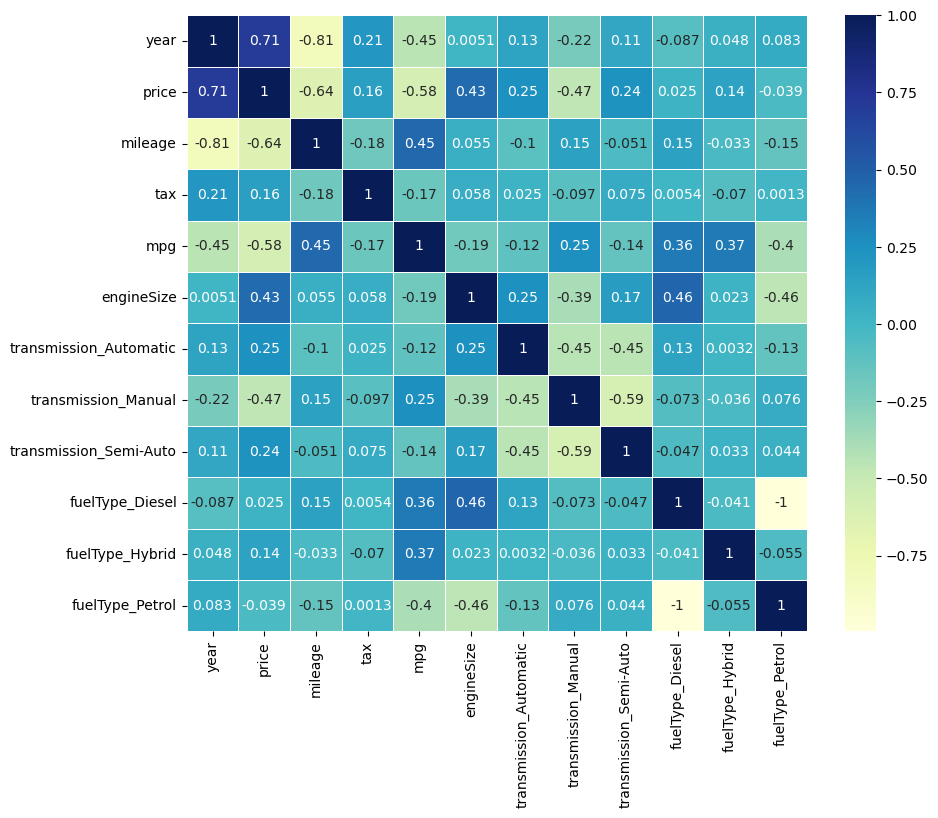

In [22]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data=car_df_one_hot_encoded.corr(), annot=True, linewidths=.5, cmap="YlGnBu", annot_kws={"size": 10})
plt.show()

In [23]:
car_df_one_hot_encoded = car_df_one_hot_encoded.drop('model', axis=1)

In [24]:
car_df_one_hot_encoded

,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,1,0,0,0,1
10,2017,16100,28955,145,58.9,1.4,0,1,0,0,0,1
11,2016,16500,52198,125,57.6,2.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2020,16999,4018,145,49.6,1.0,0,1,0,0,0,1
10664,2020,16999,1978,150,49.6,1.0,0,1,0,0,0,1
10665,2020,17199,609,150,49.6,1.0,0,1,0,0,0,1
10666,2017,19499,8646,150,47.9,1.4,1,0,0,0,0,1


In [25]:
X = car_df_one_hot_encoded.drop('price', axis=1)
y = car_df_one_hot_encoded['price']

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
lr_car = LinearRegression()

In [29]:
lr_car.fit(X_train, y_train)

LinearRegression()

In [30]:
lr_car.coef_

array([ 1.71979328e+03, -6.98502920e-02, -3.01117549e+01, -2.95263144e+02,
        5.96339638e+03,  6.40611786e+02, -1.43706211e+03,  7.96450327e+02,
       -1.17671426e+04,  2.50329650e+04, -1.32658223e+04])

In [31]:
lr_car.intercept_

-3425168.713196413

In [32]:
car_price_predictions = lr_car.predict(X_test)

In [33]:
car_price_predictions_df = pd.DataFrame([car_price_predictions, y_test]).transpose()
car_price_predictions_df.columns = ['y_pred', 'y_test']
car_price_predictions_df

,y_pred,y_test
0,16252.902768,18498.0
1,17313.152190,18495.0
2,28704.428007,27190.0
3,31757.477270,28995.0
4,25083.931864,19599.0
...,...,...
1867,28154.480789,24662.0
1868,15438.172819,17780.0
1869,23946.940953,19806.0
1870,19274.695589,18995.0


<Axes: xlabel='y_pred', ylabel='y_test'>

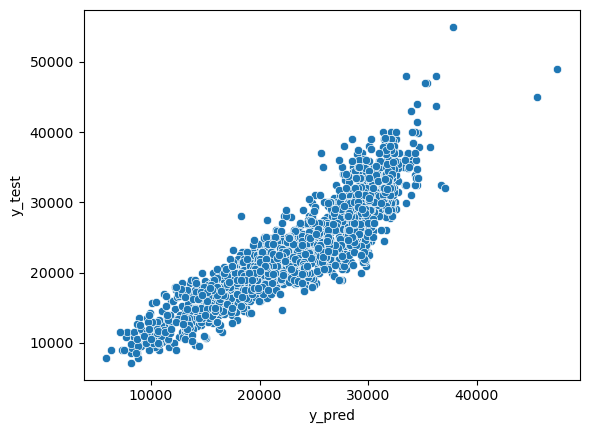

In [34]:
sns.scatterplot(x='y_pred', y='y_test', data=car_price_predictions_df)

In [35]:
print(f"MAE: {mean_absolute_error(y_true=y_test, y_pred=car_price_predictions)}")
print(f"MSE: {mean_squared_error(y_true=y_test, y_pred=car_price_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_true=y_test, y_pred=car_price_predictions))}")
print(f"R2: {r2_score(y_true=y_test, y_pred=car_price_predictions)}")

MAE: 2411.8448047028915
MSE: 9516204.793951254
RMSE: 3084.834646127934
R2: 0.8047986387860022
